### Imports

In [213]:
import numpy as np
from matplotlib import pyplot as plt

### Euler Method
$$dx=x_{i+1}-x_i$$
$$y_{i+1}=y_i+f\left(y_i, x_i\right)dx$$

In [214]:
def euler(f: callable, y: np.ndarray, x: np.ndarray, *args) -> np.ndarray:
    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        y[i + 1] = y[i] + k1
    return y

### RK2 Method
$$dx=x_{i+1}-x_i$$
$$\tilde{y}=y_i+f(y_i, x_i)dx$$
$$y_{i+1}=y_i+\frac{1}{2}\left(f\left(y_i, x_i\right)+f\left(\tilde{y}, x_i+dx\right)\right)dx$$

In [215]:
def rk2(f: callable, y: np.ndarray, x: np.ndarray, *args) -> np.ndarray:
    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + k1, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + 0.5 * (k1 + k2)
    return y

### RK4 Method
$$dx=x_{i+1}-x_i$$
$$k_1 = f\left(y_i, x_i\right)dx$$
$$k_2 = f\left(y_i + \frac{1}{2}k_1, x_i + \frac{1}{2}dx\right)dx$$
$$k_3 = f\left(y_i + \frac{1}{2}k_2, x_i + \frac{1}{2}dx\right)dx$$
$$k_4 = f\left(y_i + k_3, x_i + dx\right)dx$$
$$y_{i + 1} = y_i + \frac{1}{6}\left(k_1 + 2\left(k_2 + k_3\right) + k_4\right)$$

In [216]:
def rk4(f: callable, y: np.ndarray, x: np.ndarray, *args) -> np.ndarray:
    for i in range(len(x) - 1):
        dx = x[i + 1] - x[i]
        k1 = f(y[i], x[i], *args) * dx
        k2 = f(y[i] + 0.5 * k1, x[i] + 0.5 * dx, *args) * dx
        k3 = f(y[i] + 0.5 * k2, x[i] + 0.5 * dx, *args) * dx
        k4 = f(y[i] + k3, x[i] + dx, *args) * dx
        y[i + 1] = y[i] + (k1 + 2 * (k2 + k3) + k4) / 6
    return y

$$N\left(t\right)=N_0e^{\frac{-x}{\tau}}$$

In [217]:
def nexact(x, tau, N0):
    return N0 * np.exp(-x / tau)

$$\frac{dN}{dt}=-\frac{N}{\tau}$$

In [218]:
def f(y, x, tau):
    return - y / tau

In [219]:
N0 = 1000
tau = 1

t_i = 0  # Initial time
t_f = 5 * tau  # Final time
ratios = 1.0e-1*np.asarray([0.05, 0.2, 0.5, 1.0, 1.5])
labels = [rf'$\Delta t/\tau = {ratio:0.4f}$' for ratio in ratios]

In [220]:
t_0 = np.arange(t_i, t_f, ratios[0] * tau)
t_1 = np.arange(t_i, t_f, ratios[1] * tau)
t_2 = np.arange(t_i, t_f, ratios[2] * tau)
t_3 = np.arange(t_i, t_f, ratios[3] * tau)
t_4 = np.arange(t_i, t_f, ratios[4] * tau)

In [221]:
N_euler_i_0 = N0 * np.ones_like(t_0)
N_euler_i_1 = N0 * np.ones_like(t_1)
N_euler_i_2 = N0 * np.ones_like(t_2)
N_euler_i_3 = N0 * np.ones_like(t_3)
N_euler_i_4 = N0 * np.ones_like(t_4)
N_euler_0 = euler(f, N_euler_i_0, t_0, tau)
N_euler_1 = euler(f, N_euler_i_1, t_1, tau)
N_euler_2 = euler(f, N_euler_i_2, t_2, tau)
N_euler_3 = euler(f, N_euler_i_3, t_3, tau)
N_euler_4 = euler(f, N_euler_i_4, t_4, tau)

In [222]:
N_rk2_i_0 = N0 * np.ones_like(t_0)
N_rk2_i_1 = N0 * np.ones_like(t_1)
N_rk2_i_2 = N0 * np.ones_like(t_2)
N_rk2_i_3 = N0 * np.ones_like(t_3)
N_rk2_i_4 = N0 * np.ones_like(t_4)
N_rk2_0 = rk2(f, N_rk2_i_0, t_0, tau)
N_rk2_1 = rk2(f, N_rk2_i_1, t_1, tau)
N_rk2_2 = rk2(f, N_rk2_i_2, t_2, tau)
N_rk2_3 = rk2(f, N_rk2_i_3, t_3, tau)
N_rk2_4 = rk2(f, N_rk2_i_4, t_4, tau)

In [223]:
N_rk4_i_0 = N0 * np.ones_like(t_0)
N_rk4_i_1 = N0 * np.ones_like(t_1)
N_rk4_i_2 = N0 * np.ones_like(t_2)
N_rk4_i_3 = N0 * np.ones_like(t_3)
N_rk4_i_4 = N0 * np.ones_like(t_4)
N_rk4_0 = rk4(f, N_rk4_i_0, t_0, tau)
N_rk4_1 = rk4(f, N_rk4_i_1, t_1, tau)
N_rk4_2 = rk4(f, N_rk4_i_2, t_2, tau)
N_rk4_3 = rk4(f, N_rk4_i_3, t_3, tau)
N_rk4_4 = rk4(f, N_rk4_i_4, t_4, tau)

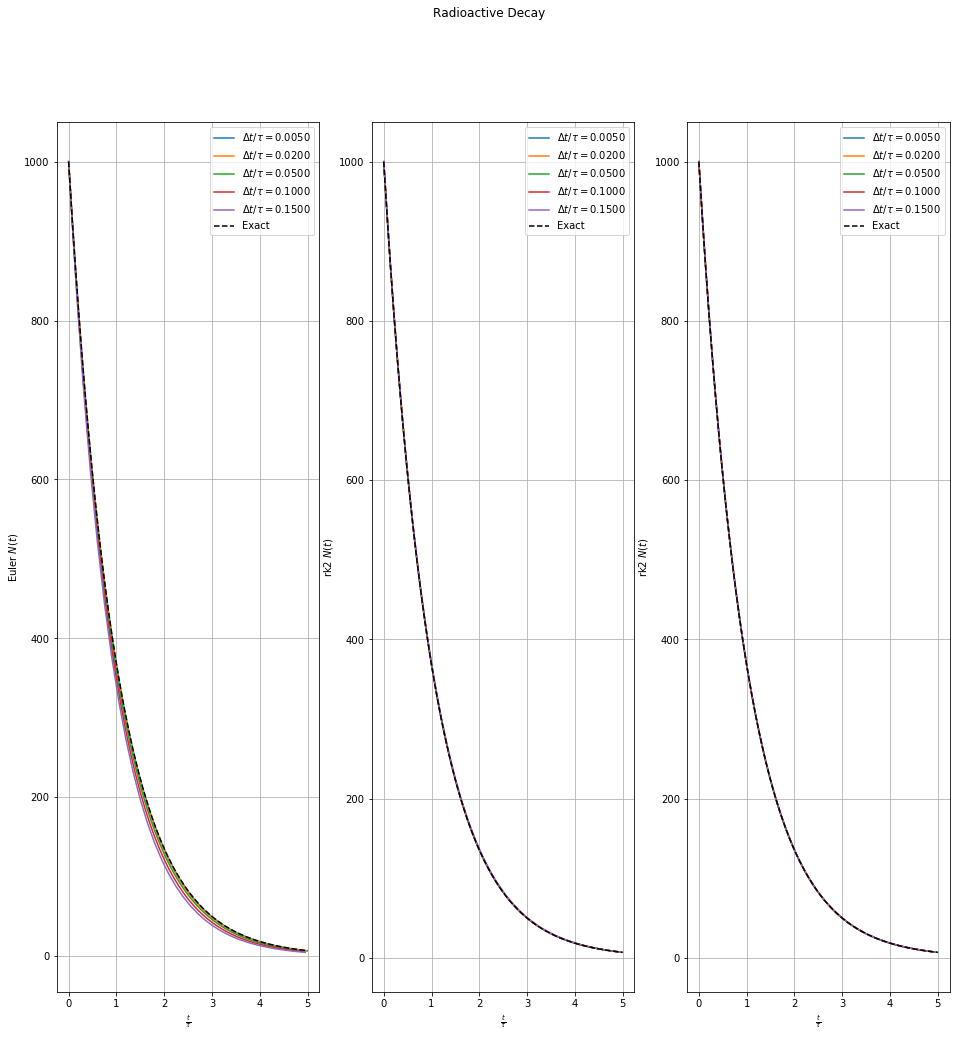

In [224]:
fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))
fig1.suptitle("Radioactive Decay")

ax1.plot(t_0 / tau, N_euler_0, label=labels[0])
ax1.plot(t_1 / tau, N_euler_1, label=labels[1])
ax1.plot(t_2 / tau, N_euler_2, label=labels[2])
ax1.plot(t_3 / tau, N_euler_3, label=labels[3])
ax1.plot(t_4 / tau, N_euler_4, label=labels[4])
ax1.plot(t_0 / tau, nexact(t_0, tau, N0), c='k',ls='--', label="Exact")

ax1.set_xlabel(r'$\frac{t}{\tau}$')
ax1.set_ylabel(r'Euler $N(t)$')
ax1.legend()
ax1.grid()

ax2.plot(t_0 / tau, N_rk2_0, label=labels[0])
ax2.plot(t_1 / tau, N_rk2_1, label=labels[1])
ax2.plot(t_2 / tau, N_rk2_2, label=labels[2])
ax2.plot(t_3 / tau, N_rk2_3, label=labels[3])
ax2.plot(t_4 / tau, N_rk2_4, label=labels[4])
ax2.plot(t_0 / tau, nexact(t_0, tau, N0), c='k',ls='--', label="Exact")

ax2.set_xlabel(r'$\frac{t}{\tau}$')
ax2.set_ylabel(r'rk2 $N(t)$')
ax2.legend()
ax2.grid()

ax3.set_ylabel(r'RK4 $N(t)$')
ax3.plot(t_0 / tau, N_rk4_0, label=labels[0])
ax3.plot(t_1 / tau, N_rk4_1, label=labels[1])
ax3.plot(t_2 / tau, N_rk4_2, label=labels[2])
ax3.plot(t_3 / tau, N_rk4_3, label=labels[3])
ax3.plot(t_4 / tau, N_rk4_4, label=labels[4])
ax3.plot(t_0 / tau, nexact(t_0, tau, N0), c='k',ls='--', label = "Exact")

ax3.set_xlabel(r'$\frac{t}{\tau}$')
ax3.set_ylabel(r'rk2 $N(t)$')
ax3.legend()
ax3.grid()

# plt.tight_layout()
# plt.show()
plt.savefig("Lab1output_comparison.png")

In [225]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

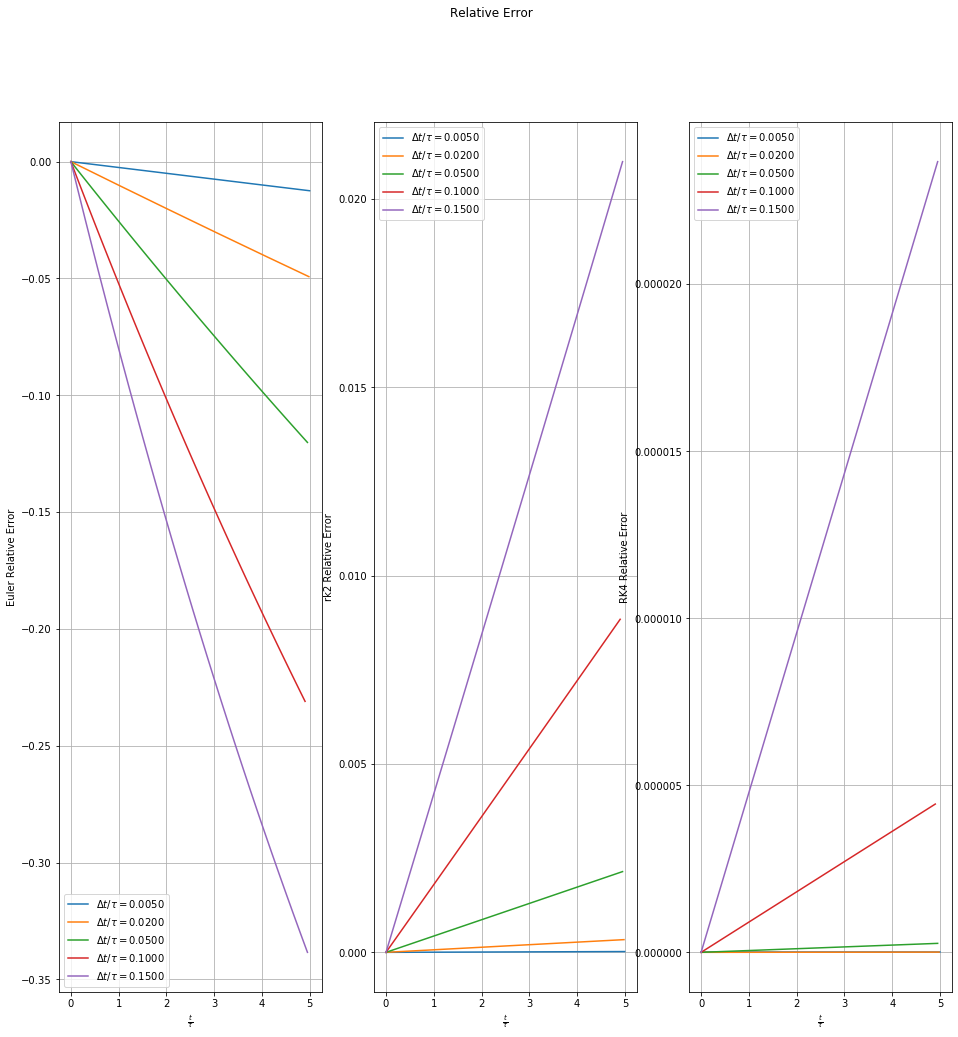

In [226]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))
fig2.suptitle("Relative Error")

ax1.plot(t_0 / tau, (N_euler_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0), label=labels[0])
ax1.plot(t_1 / tau, (N_euler_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0), label=labels[1])
ax1.plot(t_2 / tau, (N_euler_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0), label=labels[2])
ax1.plot(t_3 / tau, (N_euler_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0), label=labels[3])
ax1.plot(t_4 / tau, (N_euler_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0), label=labels[4])

ax1.set_xlabel(r'$\frac{t}{\tau}$')
ax1.set_ylabel("Euler Relative Error")
ax1.legend()
ax1.grid()

ax2.plot(t_0 / tau, (N_rk2_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0), label=labels[0])
ax2.plot(t_1 / tau, (N_rk2_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0), label=labels[1])
ax2.plot(t_2 / tau, (N_rk2_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0), label=labels[2])
ax2.plot(t_3 / tau, (N_rk2_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0), label=labels[3])
ax2.plot(t_4 / tau, (N_rk2_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0), label=labels[4])

ax2.set_xlabel(r'$\frac{t}{\tau}$')
ax2.set_ylabel("rk2 Relative Error")
ax2.legend()
ax2.grid()

ax3.plot(t_0 / tau, (N_rk4_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0), label=labels[0])
ax3.plot(t_1 / tau, (N_rk4_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0), label=labels[1])
ax3.plot(t_2 / tau, (N_rk4_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0), label=labels[2])
ax3.plot(t_3 / tau, (N_rk4_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0), label=labels[3])
ax3.plot(t_4 / tau, (N_rk4_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0), label=labels[4])

ax3.set_xlabel(r'$\frac{t}{\tau}$')
ax3.set_ylabel("RK4 Relative Error")
ax3.legend()
ax3.grid()

# plt.tight_layout()
# plt.show()
plt.savefig("Lab1output_relative_error.png")

In [227]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

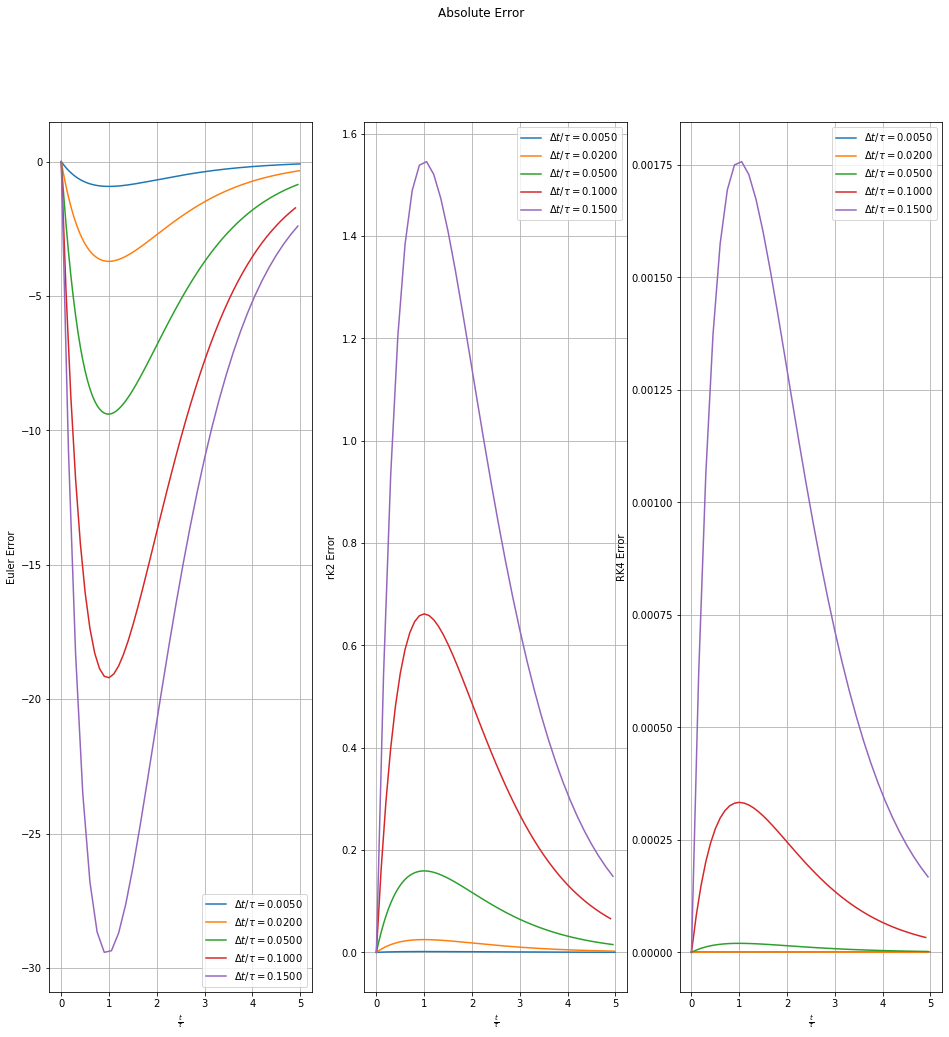

In [228]:
fig3, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))
fig3.suptitle("Absolute Error")

ax1.plot(t_0 / tau, N_euler_0 - nexact(t_0, tau, N0), label=labels[0])
ax1.plot(t_1 / tau, N_euler_1 - nexact(t_1, tau, N0), label=labels[1])
ax1.plot(t_2 / tau, N_euler_2 - nexact(t_2, tau, N0), label=labels[2])
ax1.plot(t_3 / tau, N_euler_3 - nexact(t_3, tau, N0), label=labels[3])
ax1.plot(t_4 / tau, N_euler_4 - nexact(t_4, tau, N0), label=labels[4])

ax1.set_xlabel(r'$\frac{t}{\tau}$')
ax1.set_ylabel("Euler Error")
ax1.legend()
ax1.grid()

ax2.plot(t_0 / tau, N_rk2_0 - nexact(t_0, tau, N0), label=labels[0])
ax2.plot(t_1 / tau, N_rk2_1 - nexact(t_1, tau, N0), label=labels[1])
ax2.plot(t_2 / tau, N_rk2_2 - nexact(t_2, tau, N0), label=labels[2])
ax2.plot(t_3 / tau, N_rk2_3 - nexact(t_3, tau, N0), label=labels[3])
ax2.plot(t_4 / tau, N_rk2_4 - nexact(t_4, tau, N0), label=labels[4])

ax2.set_xlabel(r'$\frac{t}{\tau}$')
ax2.set_ylabel("rk2 Error")
ax2.legend()
ax2.grid()

ax3.plot(t_0 / tau, N_rk4_0 - nexact(t_0, tau, N0), label=labels[0])
ax3.plot(t_1 / tau, N_rk4_1 - nexact(t_1, tau, N0), label=labels[1])
ax3.plot(t_2 / tau, N_rk4_2 - nexact(t_2, tau, N0), label=labels[2])
ax3.plot(t_3 / tau, N_rk4_3 - nexact(t_3, tau, N0), label=labels[3])
ax3.plot(t_4 / tau, N_rk4_4 - nexact(t_4, tau, N0), label=labels[4])

ax3.set_xlabel(r'$\frac{t}{\tau}$')
ax3.set_ylabel("RK4 Error")  # number axis label
ax3.legend()
ax3.grid()

# plt.tight_layout()
# plt.show()
plt.savefig("Lab1output_absolute_error.png")

In [229]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

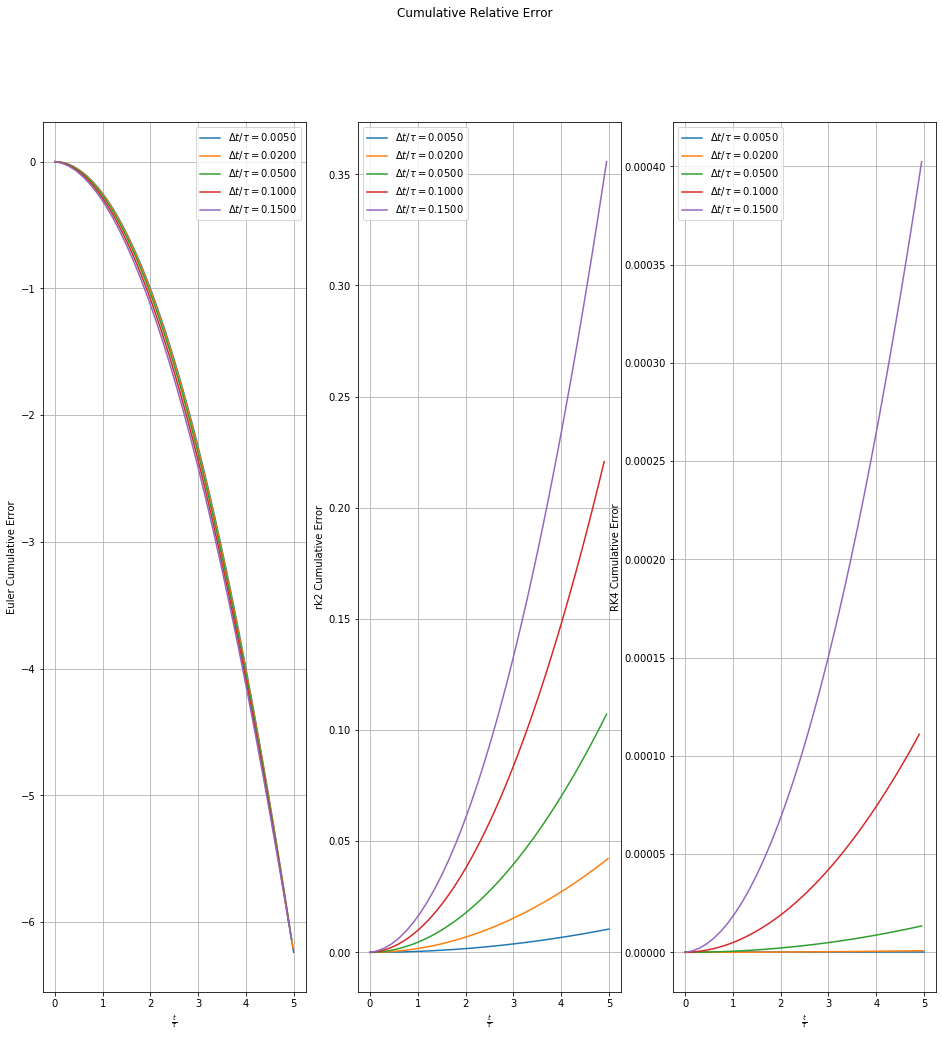

In [230]:
fig4, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))
fig4.suptitle("Cumulative Relative Error")

ax1.plot(t_0 / tau, np.cumsum((N_euler_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0)), label=labels[0])
ax1.plot(t_1 / tau, np.cumsum((N_euler_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0)), label=labels[1])
ax1.plot(t_2 / tau, np.cumsum((N_euler_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0)), label=labels[2])
ax1.plot(t_3 / tau, np.cumsum((N_euler_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0)), label=labels[3])
ax1.plot(t_4 / tau, np.cumsum((N_euler_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0)), label=labels[4])

ax1.set_xlabel(r'$\frac{t}{\tau}$')
ax1.set_ylabel("Euler Cumulative Error")
ax1.legend()
ax1.grid()

ax2.plot(t_0 / tau, np.cumsum((N_rk2_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0)), label=labels[0])
ax2.plot(t_1 / tau, np.cumsum((N_rk2_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0)), label=labels[1])
ax2.plot(t_2 / tau, np.cumsum((N_rk2_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0)), label=labels[2])
ax2.plot(t_3 / tau, np.cumsum((N_rk2_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0)), label=labels[3])
ax2.plot(t_4 / tau, np.cumsum((N_rk2_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0)), label=labels[4])

ax2.set_xlabel(r'$\frac{t}{\tau}$')
ax2.set_ylabel("rk2 Cumulative Error")
ax2.legend()
ax2.grid()

ax3.plot(t_0 / tau, np.cumsum((N_rk4_0 - nexact(t_0, tau, N0)) / nexact(t_0, tau, N0)), label=labels[0])
ax3.plot(t_1 / tau, np.cumsum((N_rk4_1 - nexact(t_1, tau, N0)) / nexact(t_1, tau, N0)), label=labels[1])
ax3.plot(t_2 / tau, np.cumsum((N_rk4_2 - nexact(t_2, tau, N0)) / nexact(t_2, tau, N0)), label=labels[2])
ax3.plot(t_3 / tau, np.cumsum((N_rk4_3 - nexact(t_3, tau, N0)) / nexact(t_3, tau, N0)), label=labels[3])
ax3.plot(t_4 / tau, np.cumsum((N_rk4_4 - nexact(t_4, tau, N0)) / nexact(t_4, tau, N0)), label=labels[4])

ax3.set_xlabel(r'$\frac{t}{\tau}$')
ax3.set_ylabel("RK4 Cumulative Error")
ax3.legend()
ax3.grid()

# plt.tight_layout()
# plt.show()
plt.savefig("Lab1output_cumulative_relative_error.png")

In [231]:
plt.cla()
plt.clf()

<Figure size 432x288 with 0 Axes>

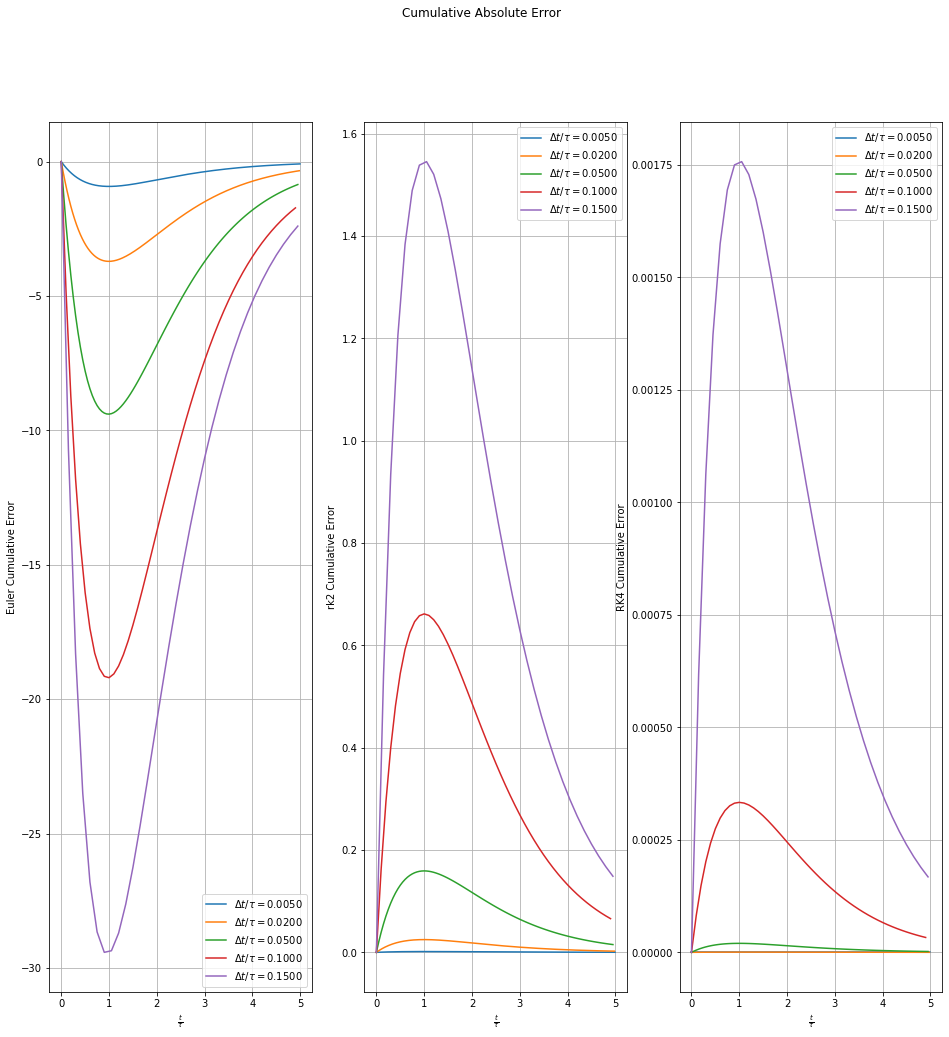

In [232]:
fig5, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,16))
fig5.suptitle("Cumulative Absolute Error")

ax1.plot(t_0 / tau, N_euler_0 - nexact(t_0, tau, N0), label=labels[0])
ax1.plot(t_1 / tau, N_euler_1 - nexact(t_1, tau, N0), label=labels[1])
ax1.plot(t_2 / tau, N_euler_2 - nexact(t_2, tau, N0), label=labels[2])
ax1.plot(t_3 / tau, N_euler_3 - nexact(t_3, tau, N0), label=labels[3])
ax1.plot(t_4 / tau, N_euler_4 - nexact(t_4, tau, N0), label=labels[4])

ax1.set_xlabel(r'$\frac{t}{\tau}$')
ax1.set_ylabel("Euler Cumulative Error")
ax1.legend()
ax1.grid()

ax2.plot(t_0 / tau, N_rk2_0 - nexact(t_0, tau, N0), label=labels[0])
ax2.plot(t_1 / tau, N_rk2_1 - nexact(t_1, tau, N0), label=labels[1])
ax2.plot(t_2 / tau, N_rk2_2 - nexact(t_2, tau, N0), label=labels[2])
ax2.plot(t_3 / tau, N_rk2_3 - nexact(t_3, tau, N0), label=labels[3])
ax2.plot(t_4 / tau, N_rk2_4 - nexact(t_4, tau, N0), label=labels[4])

ax2.set_xlabel(r'$\frac{t}{\tau}$')
ax2.set_ylabel("rk2 Cumulative Error")
ax2.legend()
ax2.grid()

ax3.plot(t_0 / tau, N_rk4_0 - nexact(t_0, tau, N0), label=labels[0])
ax3.plot(t_1 / tau, N_rk4_1 - nexact(t_1, tau, N0), label=labels[1])
ax3.plot(t_2 / tau, N_rk4_2 - nexact(t_2, tau, N0), label=labels[2])
ax3.plot(t_3 / tau, N_rk4_3 - nexact(t_3, tau, N0), label=labels[3])
ax3.plot(t_4 / tau, N_rk4_4 - nexact(t_4, tau, N0), label=labels[4])

ax3.set_xlabel(r'$\frac{t}{\tau}$')
ax3.set_ylabel("RK4 Cumulative Error")  # number axis label
ax3.legend()
ax3.grid()

# plt.tight_layout()
# plt.show()
plt.savefig("Lab1output_cumulative_absolute_error.png")